In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r'Downloads\titanic_train.csv')
df
                 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
sns.set_style('whitegrid')

In [5]:
df.isnull()['Cabin'].value_counts()

Cabin
True     687
False    204
Name: count, dtype: int64

<Axes: >

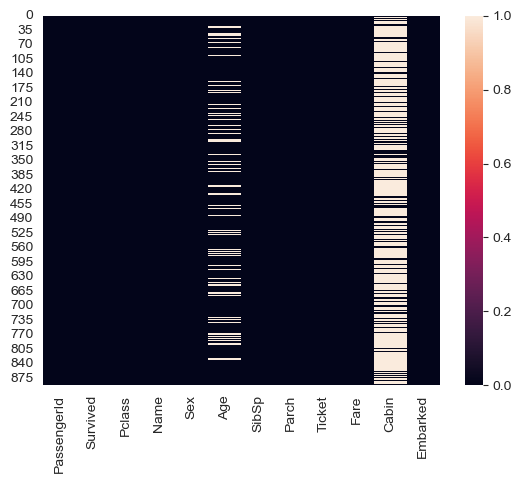

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().Age.value_counts()

Age
False    714
True     177
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

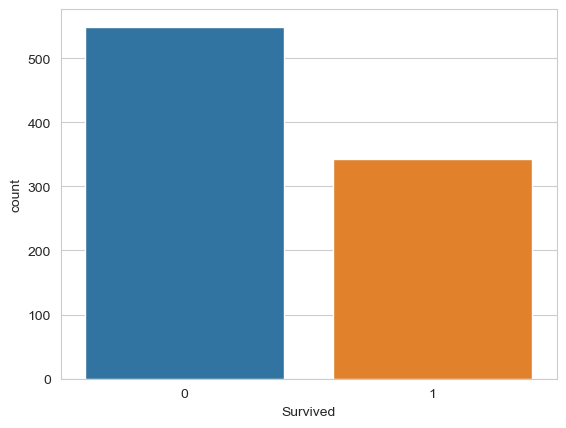

In [8]:
sns.countplot(data=df, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

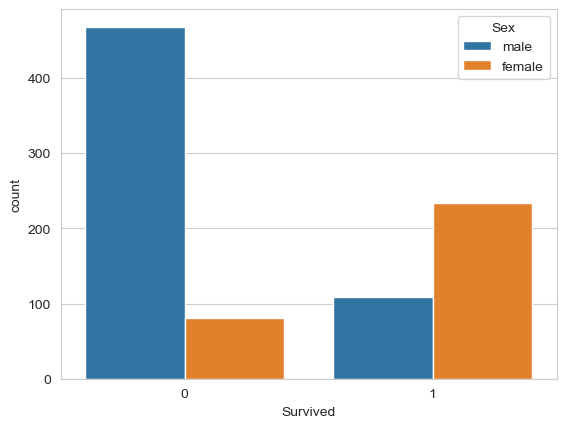

In [9]:
sns.countplot(x=df.Survived, hue=df.Sex)

<Axes: xlabel='Survived', ylabel='count'>

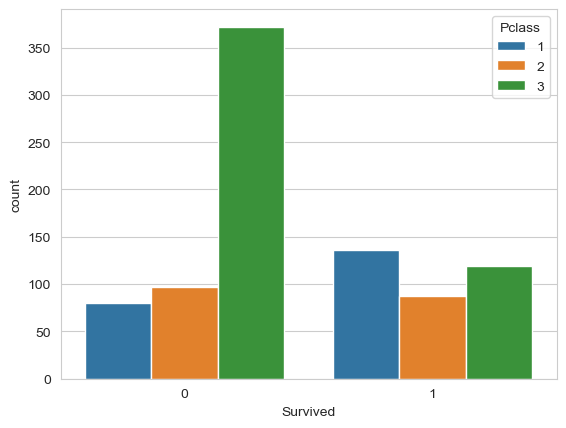

In [10]:
sns.countplot(data=df, x='Survived', hue='Pclass' )

In [11]:
df.Age.dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

<Axes: xlabel='Age'>

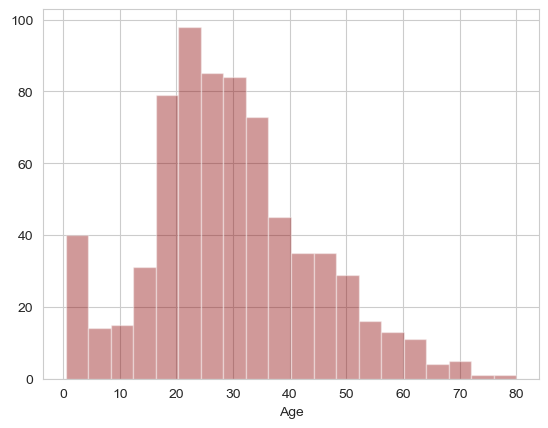

In [12]:
sns.distplot(df['Age'].dropna(),kde=False, color='darkred',)

<Axes: xlabel='SibSp', ylabel='count'>

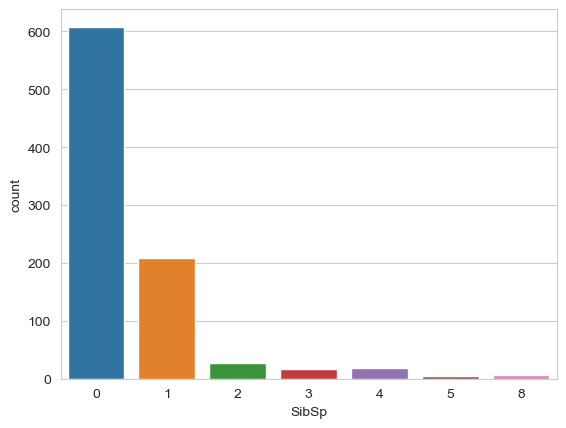

In [13]:
sns.countplot(data=df, x='SibSp')

<Axes: >

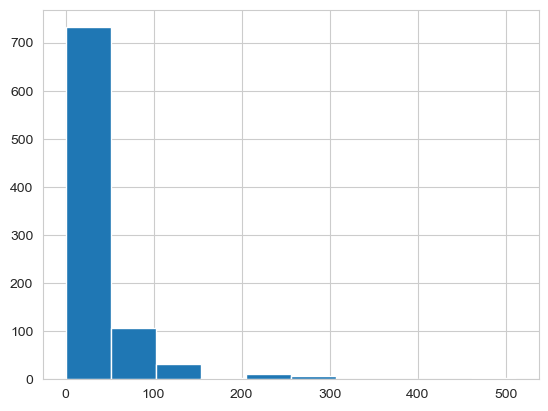

In [14]:
df.Fare.hist()

In [15]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

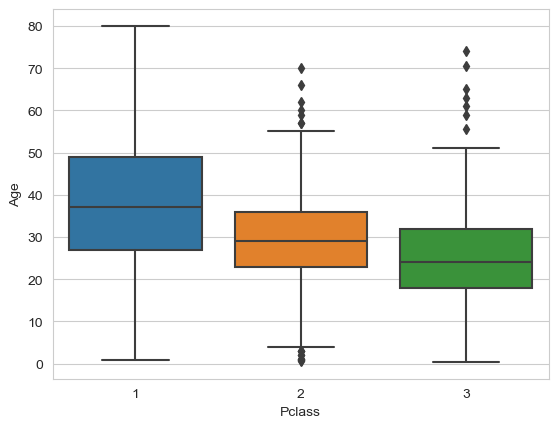

In [16]:
sns.boxplot(data=df, x='Pclass', y='Age')

In [17]:
def impute_age(cols):
    age=cols[1]
    pclass=cols[0]
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else :
            return 24
    else:
        return age

In [18]:
pclass_age = df[['Pclass','Age']]

In [19]:
df['Age'] = pclass_age.apply(impute_age, axis=1)



In [20]:
pd.isnull(df.Age[888])

False

In [21]:
df.drop('Cabin', axis=1, inplace=True)

In [22]:
train=df

In [23]:
sex = pd.get_dummies(train['Sex'], drop_first=True  )


,male
0,1
1,0
2,0
3,0
4,1


In [43]:
train.Fare.astype(int)

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int32

In [24]:
embark = pd.get_dummies(train['Embarked'], drop_first=True).astype(int)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
train.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
train=pd.concat([train, sex, embark], axis=1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Applying logistic regression on our training data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train , y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3, random_state=101)

In [31]:
x_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.5000,1,0,1
700,701,1,18.0,1,0,227.5250,0,0,0
748,749,1,19.0,1,0,53.1000,1,0,1
751,752,3,6.0,0,1,12.4750,1,0,1
481,482,2,29.0,0,0,0.0000,1,0,1
...,...,...,...,...,...,...,...,...,...
388,389,3,24.0,0,0,7.7292,1,1,0
416,417,2,34.0,1,1,32.5000,0,0,1
407,408,2,3.0,1,1,18.7500,1,0,1
482,483,3,50.0,0,0,8.0500,1,0,1


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression().fit(x_train, y_train)

In [34]:
predictions = logmodel.predict(x_test)

In [35]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
accuracy = confusion_matrix(y_test, predictions)

In [38]:
accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy = accuracy_score(y_test, predictions)

In [41]:
accuracy

0.7686567164179104